##### Import Necessary libraries

In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.api as sm



data = pd.read_csv(r"C:\Users\thars\Downloads\Thecleverprogrammer.csv\Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [6]:
# let's convert the Date column to date format
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


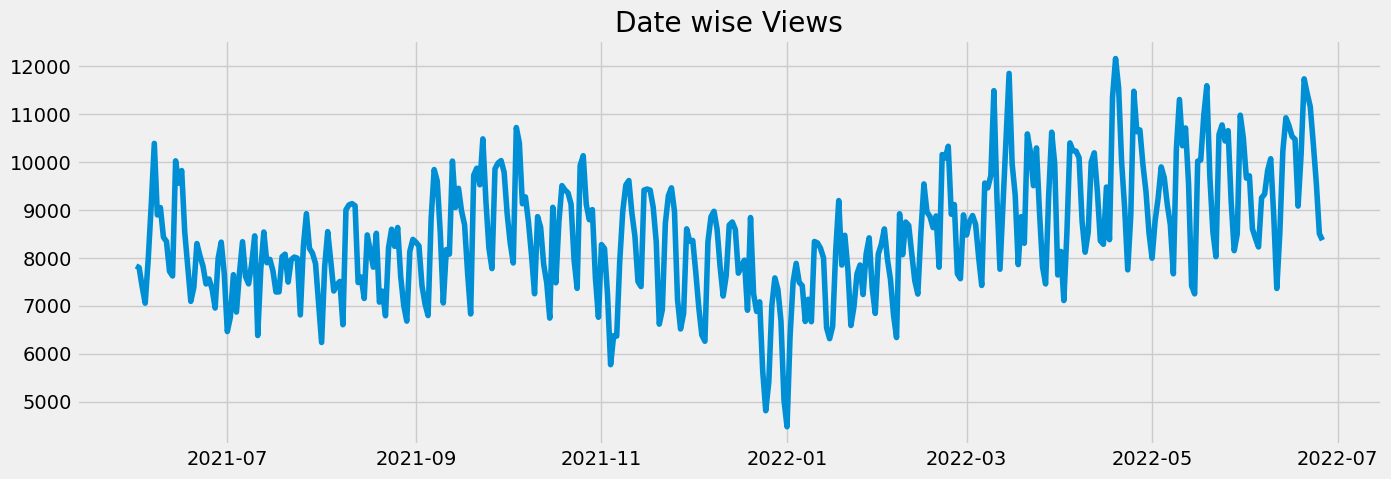

In [8]:
#let's plot
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 5))
plt.plot(data["Date"], data["Views"])
plt.title("The Daily Traffic of thecleverprogramming.com website")
plt.show()

<Figure size 640x480 with 0 Axes>

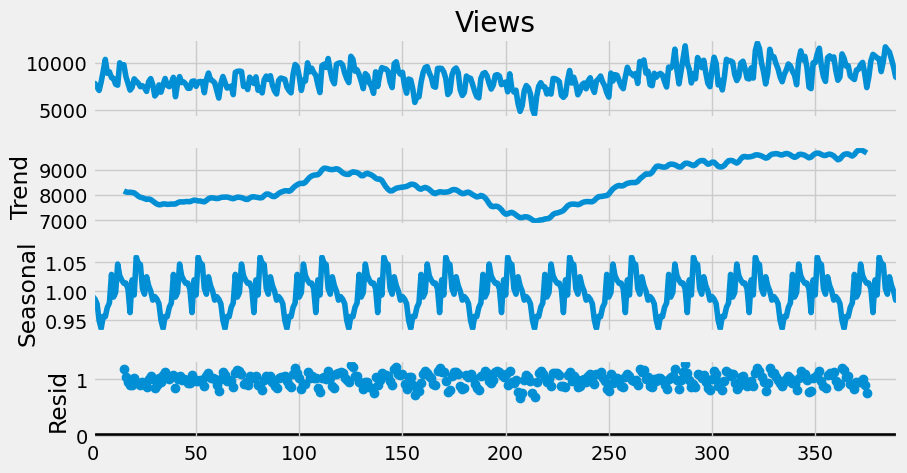

In [13]:
result = seasonal_decompose(data["Views"],
                            model="multiplicative",
                            period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 5)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

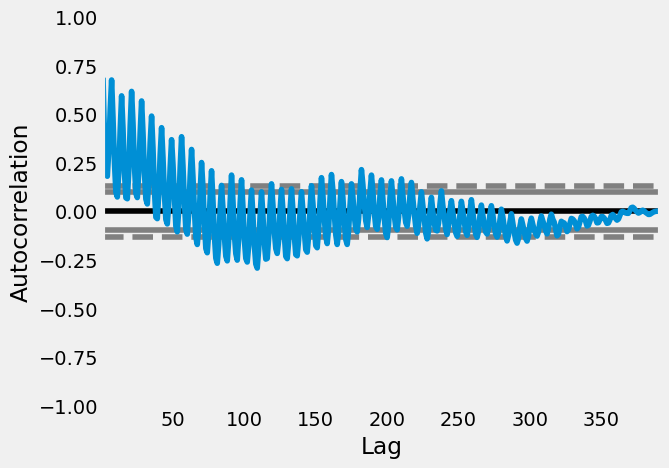

In [14]:
# plot acf plot
pd.plotting.autocorrelation_plot(data["Views"])

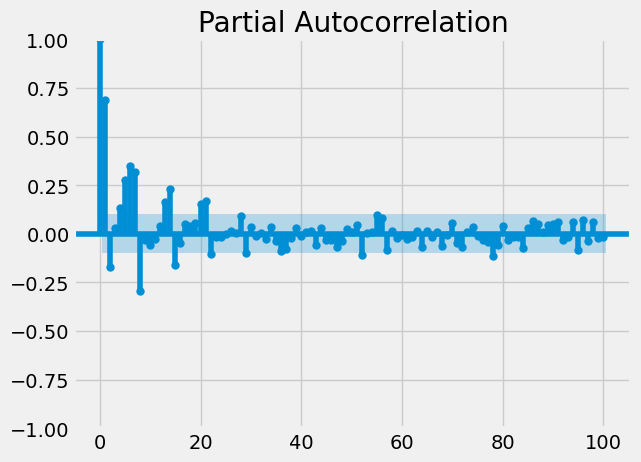

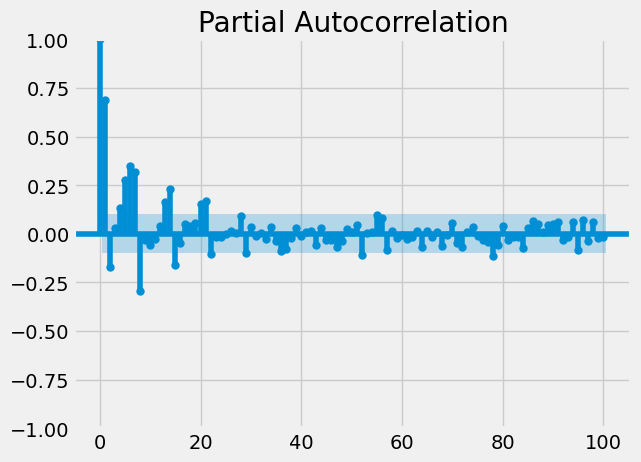

In [15]:
#ploting pacf plot
plot_pacf(data["Views"], lags=100)

In [17]:
p, d, q = 2, 1, 5
model = sm.statespace.SARIMAX(data["Views"],
                              order=(p,d,q),
                              seasonal_order=(p,d,q, 12))
model = model.fit()
print(model.summary())

c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(2, 1, 5)x(2, 1, 5, 12)   Log Likelihood               -3137.756
Date:                            Wed, 23 Oct 2024   AIC                           6305.511
Time:                                    10:19:01   BIC                           6364.535
Sample:                                         0   HQIC                          6328.937
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2449      0.016     77.143      0.000       1.213       1.277
ar.L2         -0.9940      0.016   

In [20]:
#now let's forecast the traffic for the next 100 days
predictions = model.predict(len(data), len(data) + 50)
print(predictions)

391     9947.796424
392    10793.910312
393    10948.600670
394    10039.863940
395     8861.032756
396     8403.363828
397     9082.705088
398     9941.216214
399    10512.159465
400    10880.874359
401     9919.465825
402     9297.737814
403     9051.527406
404     9273.385980
405    10633.163188
406    10903.926939
407    10962.865234
408    10253.723244
409     9580.368870
410     9009.612418
411     9402.793055
412    10536.568860
413    10589.707510
414    10906.893640
415    10456.263720
416     9585.315348
417     9401.016702
418     9354.774260
419    10122.282333
420    10588.000684
421    11164.111895
422    10336.838242
423     9810.215353
424     9526.070570
425     9184.037708
426    10346.783620
427    10990.712495
428    11256.650470
429    10747.414607
430     9654.375965
431     9180.121614
432     9203.703805
433    10457.372385
434    10841.516913
435    11348.171084
436    10813.898666
437     9578.146166
438     9405.076417
439     9498.311211
440    10575.662165


<Axes: >

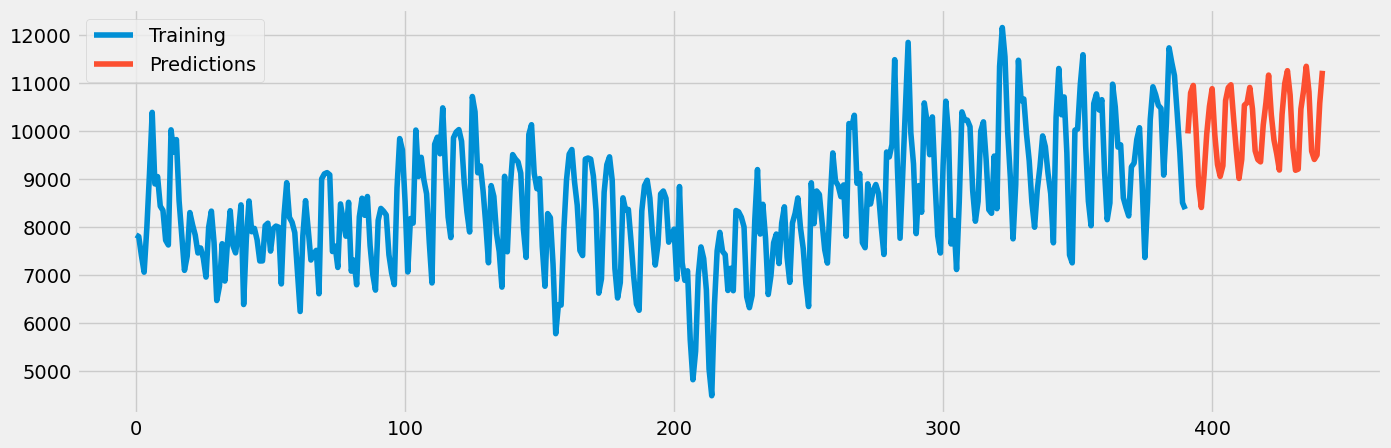

In [23]:
#here's how you can plot the fig
data["Views"].plot(legend=True, label="Training", figsize=(15, 5))
predictions.plot(legend=True, label="Predictions")